In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [11]:
fraud=pd.read_csv('creditcard.csv')

In [12]:
fraud.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [13]:
fraud.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [14]:
fraud.size

8829017

In [15]:
fraud.columns=fraud.columns.str.lower()

In [16]:
fraud.columns

Index(['time', 'v1', 'v2', 'v3', 'v4', 'v5', 'v6', 'v7', 'v8', 'v9', 'v10',
       'v11', 'v12', 'v13', 'v14', 'v15', 'v16', 'v17', 'v18', 'v19', 'v20',
       'v21', 'v22', 'v23', 'v24', 'v25', 'v26', 'v27', 'v28', 'amount',
       'class'],
      dtype='object')

In [17]:
fraud.drop_duplicates(subset=['time', 'v1', 'v2', 'v3', 'v4', 'v5', 'v6', 'v7', 'v8', 'v9', 'v10',
       'v11', 'v12', 'v13', 'v14', 'v15', 'v16', 'v17', 'v18', 'v19', 'v20',
       'v21', 'v22', 'v23', 'v24', 'v25', 'v26', 'v27', 'v28', 'amount',
       'class'],keep='first',inplace=True)

In [18]:
fraud.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 283726 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   time    283726 non-null  float64
 1   v1      283726 non-null  float64
 2   v2      283726 non-null  float64
 3   v3      283726 non-null  float64
 4   v4      283726 non-null  float64
 5   v5      283726 non-null  float64
 6   v6      283726 non-null  float64
 7   v7      283726 non-null  float64
 8   v8      283726 non-null  float64
 9   v9      283726 non-null  float64
 10  v10     283726 non-null  float64
 11  v11     283726 non-null  float64
 12  v12     283726 non-null  float64
 13  v13     283726 non-null  float64
 14  v14     283726 non-null  float64
 15  v15     283726 non-null  float64
 16  v16     283726 non-null  float64
 17  v17     283726 non-null  float64
 18  v18     283726 non-null  float64
 19  v19     283726 non-null  float64
 20  v20     283726 non-null  float64
 21  v21     28

<AxesSubplot:xlabel='class', ylabel='count'>

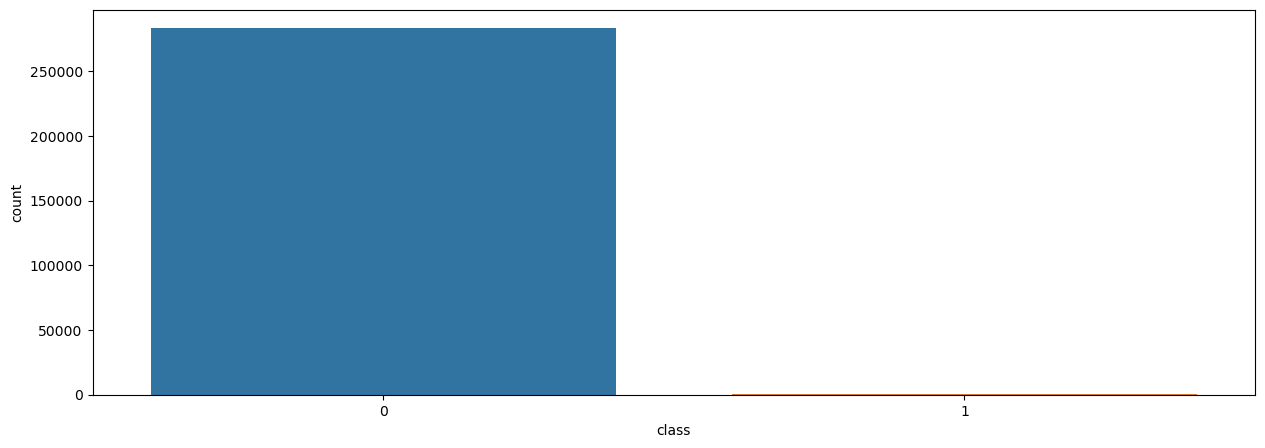

In [19]:
plt.figure(figsize=(15,5))
sns.countplot(data=fraud,x='class')

In [20]:
fraud['class'].value_counts().to_frame()

,class
0,283253
1,473


In [21]:
from sklearn.utils import resample

In [23]:
fraud_majority=fraud[fraud['class']==0]
fraud_minority=fraud[fraud['class']==1]

In [24]:
fraud_majority_downsample=resample(fraud_majority,n_samples=473,replace=False,random_state=42)

In [25]:
fraud_dataset=pd.concat([fraud_majority_downsample,fraud_minority])

In [26]:
fraud_dataset['class'].value_counts().to_frame()

,class
0,473
1,473


<AxesSubplot:xlabel='class', ylabel='count'>

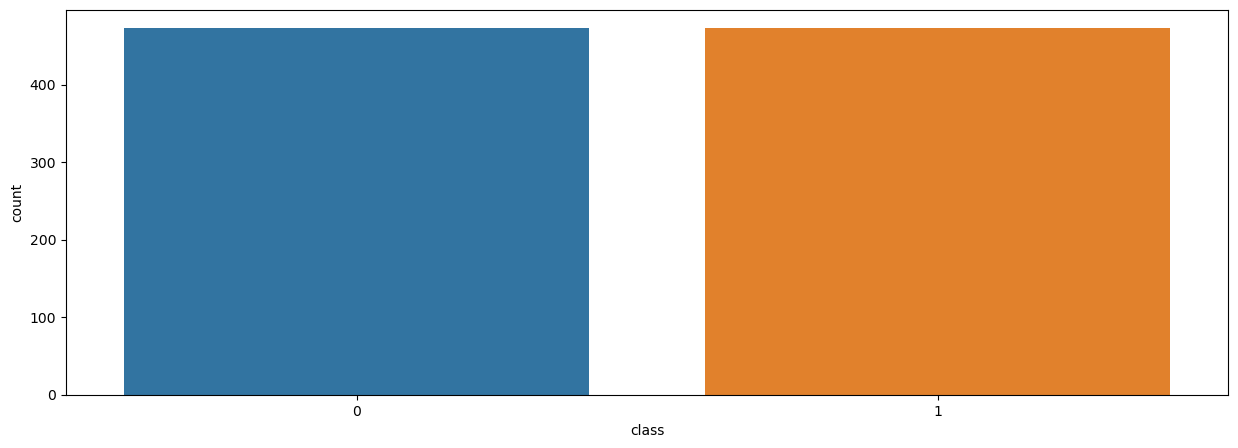

In [27]:
plt.figure(figsize=(15,5))
sns.countplot(data=fraud_dataset,x='class')

In [28]:
dataset_corr_class=fraud_dataset.corr()['class'].to_frame()

<AxesSubplot:xlabel='class'>

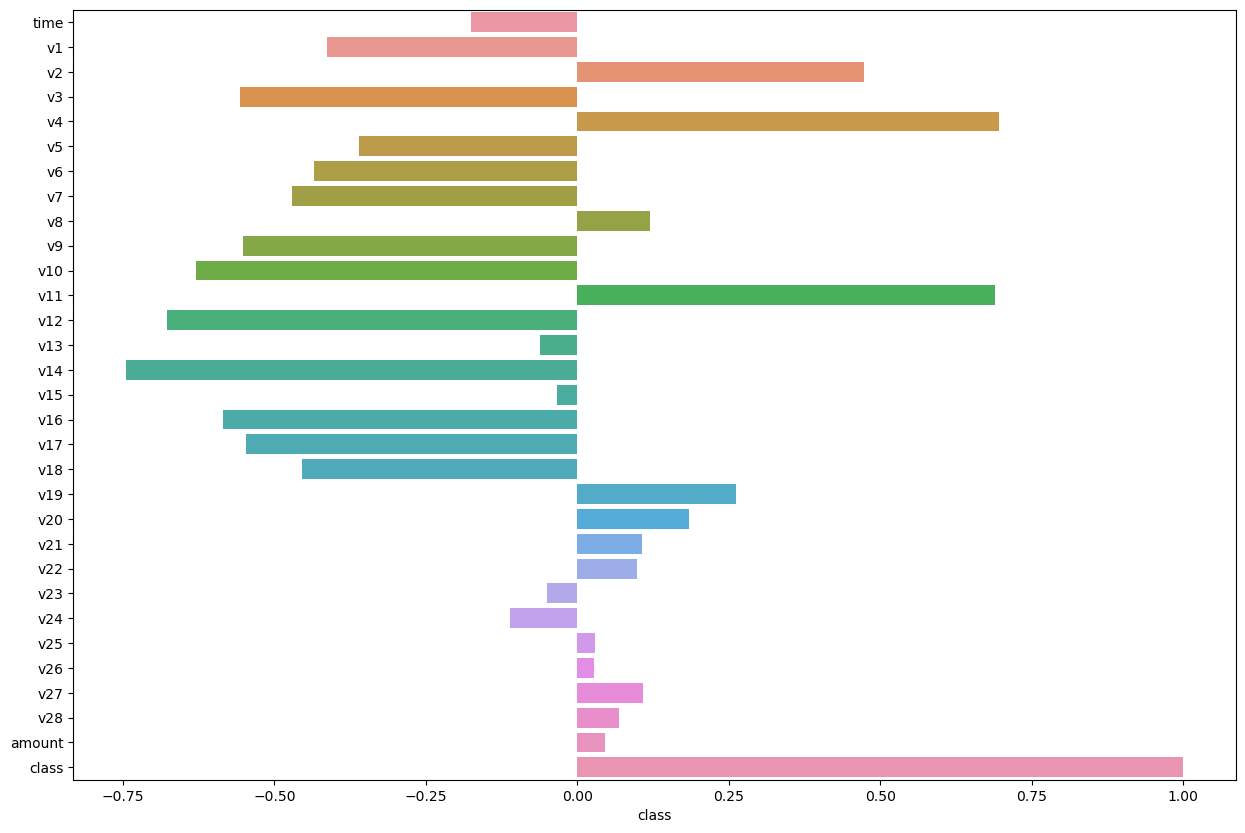

In [29]:
plt.figure(figsize=(15,10))
sns.barplot(data=dataset_corr_class,y=dataset_corr_class.index,x='class')

In [30]:
x=fraud_dataset.drop(['class'],axis=1)
y=fraud_dataset['class']

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [33]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((662, 30), (284, 30), (662,), (284,))

In [34]:
from sklearn.linear_model import LogisticRegression

In [35]:
lr=LogisticRegression(max_iter=500)

In [36]:
lr.fit(x_train,y_train)

LogisticRegression(max_iter=500)